In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [123]:
train=pd.read_csv("C:\\Users\\vipul\\Desktop\\test.csv")


In [124]:
train.describe()

,id,nodes,edges,type,result,avgcoeff,no_of_tri,closed_tri,diameter
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.075514e+06,3.014066e+12,1.515000,1.559000,0.493176,1.542462e+14,0.077661,10.502000
std,288.819436,2.967913e+06,6.858907e+12,1.109507,1.112545,0.288838,4.052777e+14,0.047174,5.771248
min,1.000000,9.600000e+01,1.038000e+03,0.000000,0.000000,0.000011,3.491400e+04,0.000002,1.000000
25%,250.750000,1.276325e+04,2.482822e+07,1.000000,1.000000,0.244136,7.157229e+08,0.037930,5.000000
50%,500.500000,2.165955e+05,7.531129e+09,2.000000,2.000000,0.480811,2.759959e+11,0.076573,11.000000
75%,750.250000,3.030460e+06,1.830997e+12,2.000000,3.000000,0.735482,7.643888e+13,0.112998,15.000000
max,1000.000000,9.999667e+06,4.098261e+13,3.000000,3.000000,0.999250,3.558069e+15,0.192752,20.000000


In [125]:
train.head()

,id,nodes,edges,type,result,avgcoeff,no_of_tri,closed_tri,diameter
0,1,7568,23267099,1,1,0.546112,2044325550,0.081982,15
1,2,4945192,3423620342807,1,3,0.097773,102602410889840,0.017911,19
2,3,37893,437435660,0,1,0.288365,19398139006,0.049422,11
3,4,30270,405375714,1,1,0.857595,32517044031,0.124200,13
4,5,9925,24129681,1,1,0.132049,1960980594,0.021034,4


In [126]:
train['id'].nunique()

1000

In [127]:
train.columns

Index(['id', 'nodes', 'edges', 'type', 'result', 'avgcoeff', 'no_of_tri',
       'closed_tri', 'diameter'],
      dtype='object')

In [128]:
train['result'].nunique()

4

In [129]:
train.shape

(1000, 9)

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
id            1000 non-null int64
nodes         1000 non-null int64
edges         1000 non-null int64
type          1000 non-null int64
result        1000 non-null int64
avgcoeff      1000 non-null float64
no_of_tri     1000 non-null int64
closed_tri    1000 non-null float64
diameter      1000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


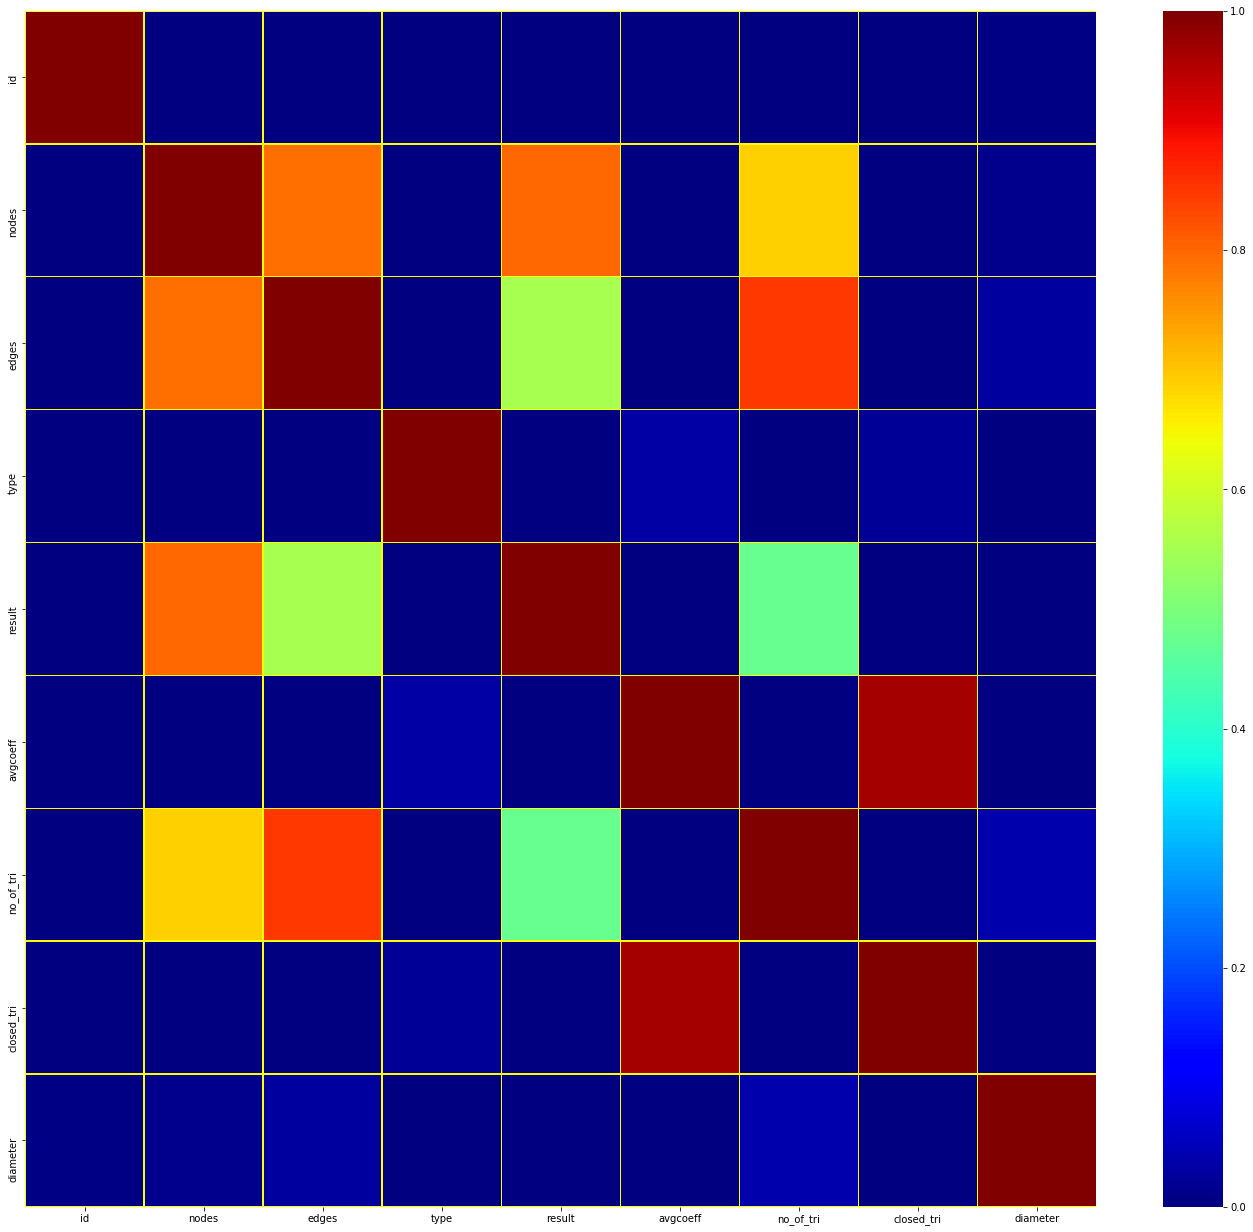

In [131]:
corr = train.corr()
#fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize = (24,22))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="jet",vmin=0,vmax=1,linecolor="yellow",fmt="d",linewidths=.5)

In [132]:
corr
cmat = pd.DataFrame(corr)
cmat.to_csv('correlation_matrix.csv', index=False)

In [133]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [134]:
#test.columns[test.isnull().any()].nunique()

In [135]:
#misstest=test.isnull().sum()/len(test)
#misstest=misstest[misstest>0]
#misstest.sort_values(inplace =True)
#misstest

In [136]:
train.columns[train.isnull().any()].nunique()

0

In [137]:
miss=train.isnull().sum()/len(train)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [138]:
train['result'].skew()

-0.06360056428503869

C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


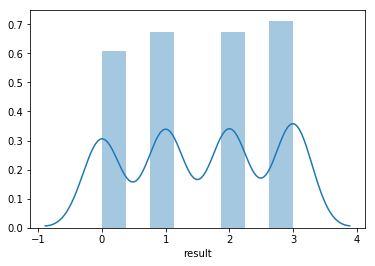

In [139]:
sns.distplot(train['result'])

In [140]:
target=np.log(train['result'])
target.skew()

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


nan

In [141]:
#sns.distplot(target)

C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

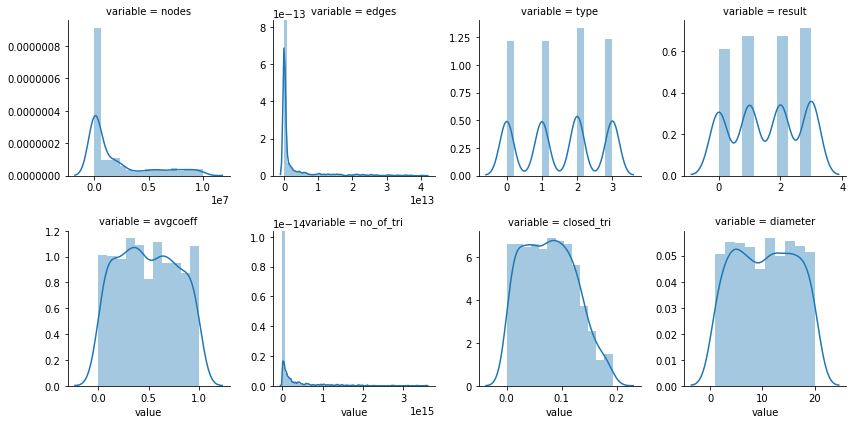

In [142]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [143]:
X=train[['id', 'nodes', 'edges', 'type', 'avgcoeff', 'no_of_tri',
       'closed_tri', 'diameter']]
y=train['result']

In [144]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.10)

    using Dense Neural Network

In [145]:
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
y_b = to_categorical(ytrain)

Epoch 1/30
900/900 [==============================] - 1s 870us/step - loss: 1.3874 - acc: 0.2700
Epoch 2/30
900/900 [==============================] - 0s 389us/step - loss: 1.3858 - acc: 0.2700
Epoch 3/30
900/900 [==============================] - 0s 374us/step - loss: 1.3855 - acc: 0.2700
Epoch 4/30
900/900 [==============================] - 0s 406us/step - loss: 1.3847 - acc: 0.2700
Epoch 5/30
900/900 [==============================] - 0s 389us/step - loss: 1.3846 - acc: 0.2700
Epoch 6/30
900/900 [==============================] - 0s 412us/step - loss: 1.3847 - acc: 0.2700
Epoch 7/30
900/900 [==============================] - 0s 418us/step - loss: 1.3852 - acc: 0.2700
Epoch 8/30
900/900 [==============================] - 0s 407us/step - loss: 1.3845 - acc: 0.2700
Epoch 9/30
900/900 [==============================] - 0s 390us/step - loss: 1.3852 - acc: 0.2700
Epoch 10/30
900/900 [==============================] - 0s 405us/step - loss: 1.3847 - acc: 0.2700
Epoch 11/30
900/900 [========

Text(0.5,0,'epoch')

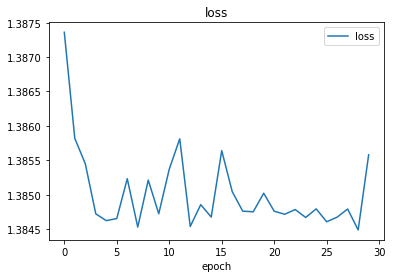

In [146]:
model = Sequential()
model.add(Dense(5000, input_shape=(8,), activation='softmax'))
model.add(Dense(20, activation='softmax'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(lr = 0.01), 'categorical_crossentropy', metrics=['accuracy'])
h=model.fit(x=xtrain,y=y_b,verbose=1,batch_size=100,epochs=30,shuffle='true')


plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')


Text(0.5,0,'epoch')

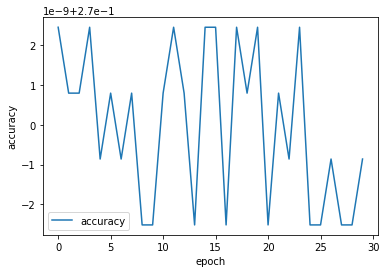

In [147]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [148]:
predict = model.predict_classes(xtest)

In [149]:
predict

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)